In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

%pylab inline

pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
data.shape

(1599, 12)

In [9]:
data.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
data.groupby('quality').count().ix[:,:1] / data.shape[0]

,fixed acidity
quality,
3,0.006254
4,0.033146
5,0.425891
6,0.398999
7,0.124453
8,0.011257


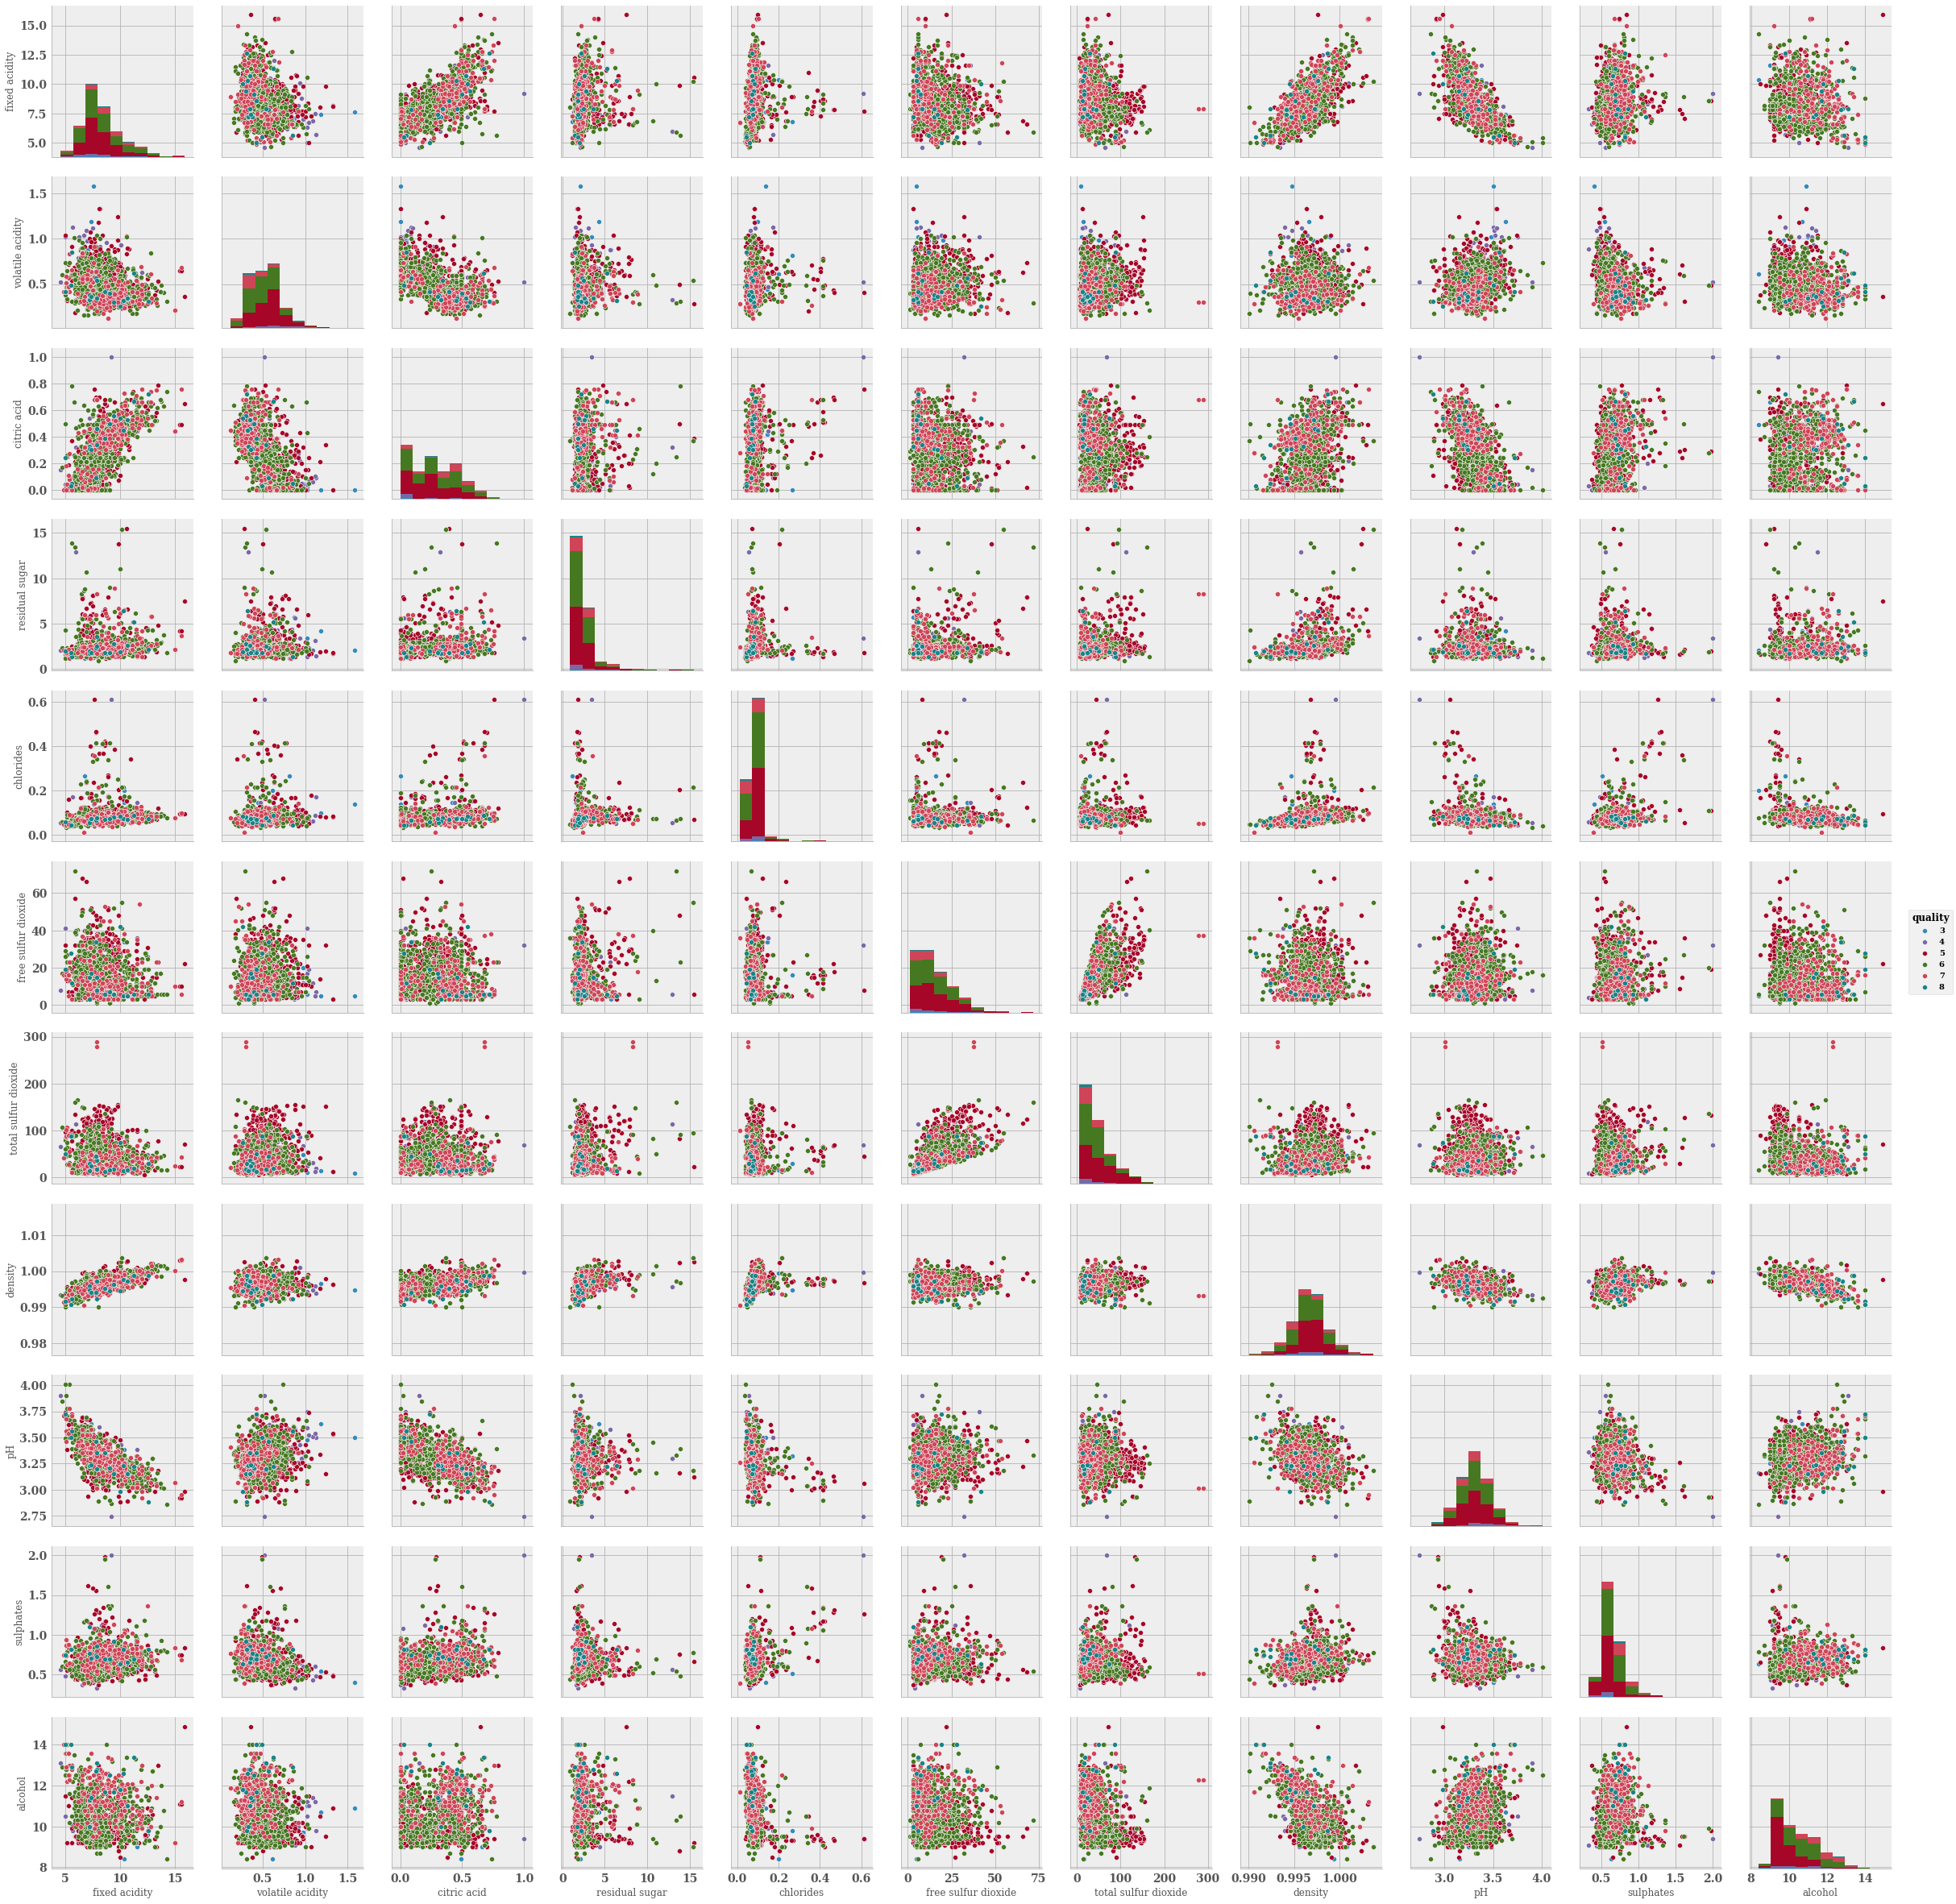

In [23]:
sns.pairplot(data, hue = 'quality', vars = data.columns[:-1], size = 3)

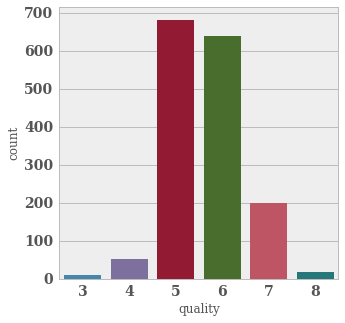

In [37]:
fig, ax = pyplot.subplots(figsize = (5, 5))
sns.countplot(x = 'quality', data = data, ax = ax)

In [25]:
data.groupby('quality').agg(['min', 'max', 'median', 'mean']).ix[:,:8]

fixed acidity                        volatile acidity                \
                  min   max median      mean              min    max median   
quality                                                                       
3                 6.7  11.6   7.50  8.360000             0.44  1.580  0.845   
4                 4.6  12.5   7.50  7.779245             0.23  1.130  0.670   
5                 5.0  15.9   7.80  8.167254             0.18  1.330  0.580   
6                 4.7  14.3   7.90  8.347179             0.16  1.040  0.490   
7                 4.9  15.6   8.80  8.872362             0.12  0.915  0.370   
8                 5.0  12.6   8.25  8.566667             0.26  0.850  0.370   

                   
             mean  
quality            
3        0.884500  
4        0.693962  
5        0.577041  
6        0.497484  
7        0.403920  
8        0.423333

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA78048>,
      dtype=object)

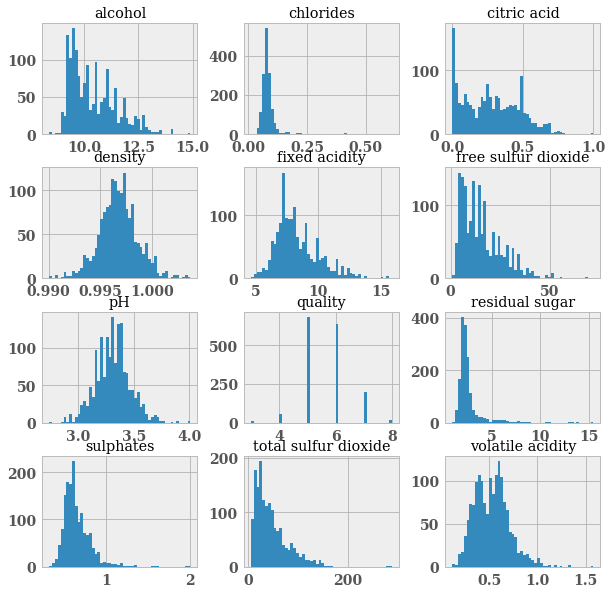

In [10]:
data.ix[-1].hist(figsize = (10, 10), bins = 50)

In [11]:
data['total sulfur dioxide'] = np.log(data['total sulfur dioxide'])
data['alcohol'],_ = scipy.stats.boxcox(np.array(data['alcohol']))
data['chlorides'] = np.log(data['chlorides'])
data['free sulfur dioxide'] = np.log(data['free sulfur dioxide'])
data['residual sugar'] = np.log(data['residual sugar'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5DF358>,
      dtype=object)

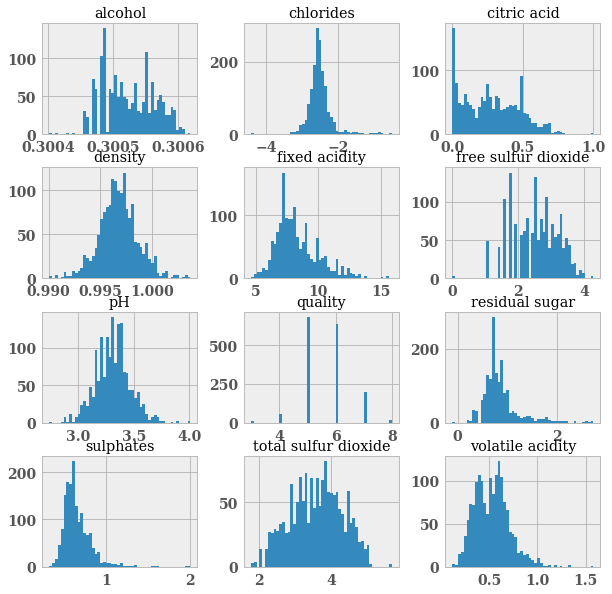

In [12]:
data.ix[:-1].hist(figsize = (10, 10), bins = 50)

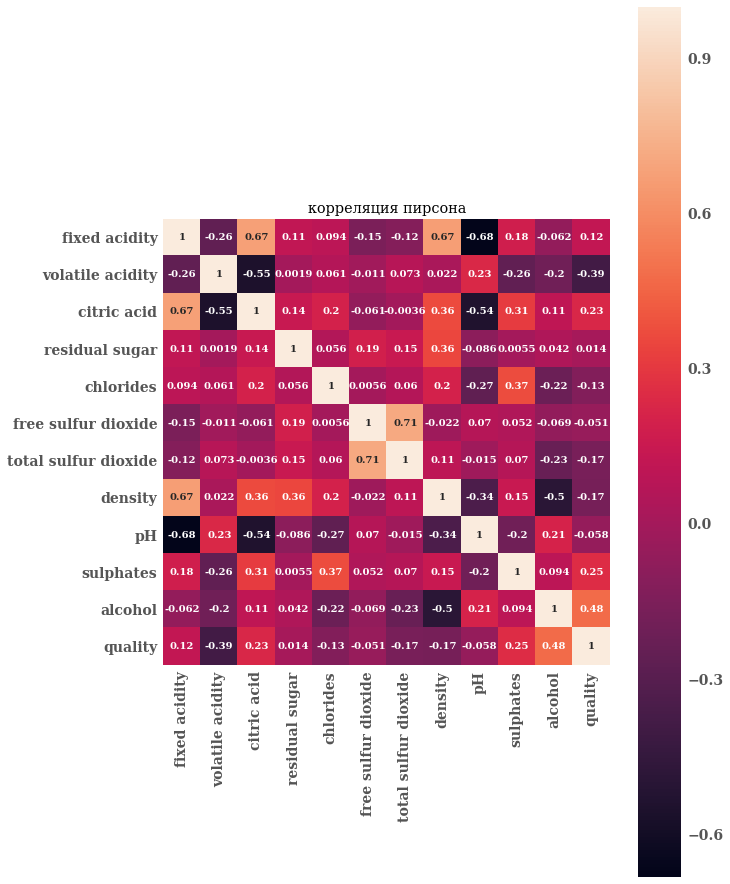

In [31]:
plt.figure(figsize=(10, 16))
sns.heatmap(data.corr(method = 'pearson'), square=True, annot=True)
plt.title(u'корреляция пирсона')
plt.legend()

$H_0:corr(x_1, x_2) = 0 $


$H_1:corr(x_1, x_2) \neq 0$

In [30]:
print('значение статистики и p-value для free sulfur dioxide - total sulfur dioxide:')
print(scipy.stats.pearsonr(data['free sulfur dioxide'], data['total sulfur dioxide']))
print('значение статистики и p-value для pH - fixed acidity:')
print(scipy.stats.pearsonr(data['pH'], data['fixed acidity']))
print('значение статистики и p-value для  volatile acidity - citric acid:')
print(scipy.stats.pearsonr(data['volatile acidity'], data['citric acid']))
print('значение статистики и p-value для  pH - citric acid:')
print(scipy.stats.pearsonr(data['pH'], data['citric acid']))
print('значение статистики и p-value для  alcohol - density:')
print(scipy.stats.pearsonr(data['alcohol'], data['density']))

значение статистики и p-value для free sulfur dioxide - total sulfur dioxide:
(0.7135357547906379, 4.797031848872061e-249)
значение статистики и p-value для pH - fixed acidity:
(-0.6829781945685314, 4.0630340398449125e-220)
значение статистики и p-value для  volatile acidity - citric acid:
(-0.5524956845595801, 1.8056634143411017e-128)
значение статистики и p-value для  pH - citric acid:
(-0.5419041447395095, 1.0072013259119546e-122)
значение статистики и p-value для  alcohol - density:
(-0.4961797702417011, 3.938835339991827e-100)


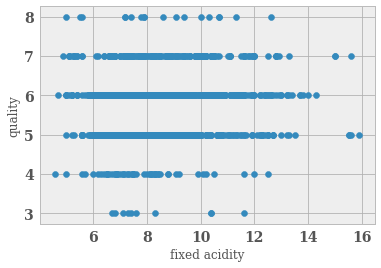

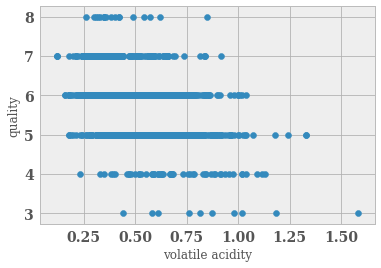

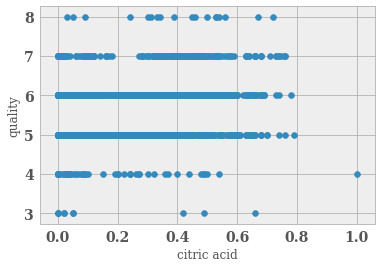

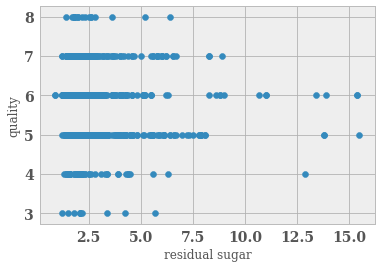

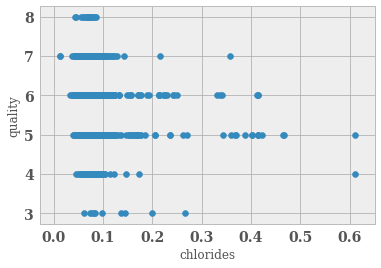

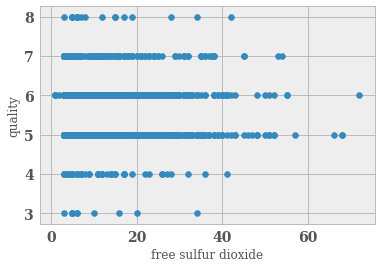

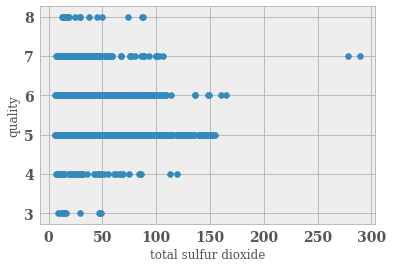

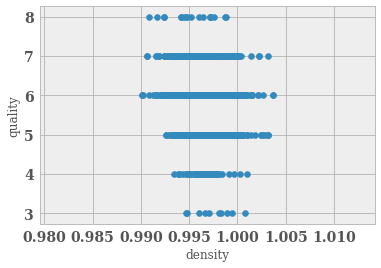

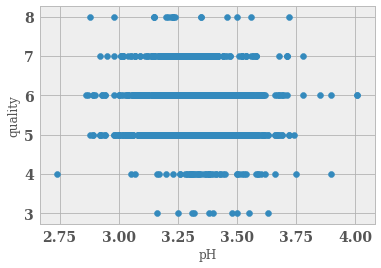

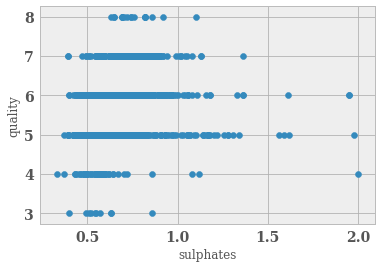

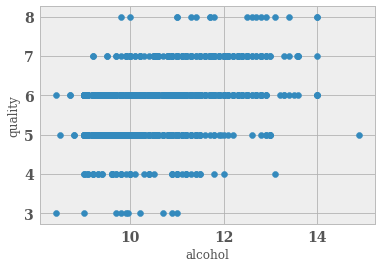

In [6]:
for row in data.columns[:-1]:
    plt.figure()
    plt.scatter(data[row], data['quality'])
    plt.xlabel(row)
    plt.ylabel('quality')